# **Imports**

In [3]:
import os
os.chdir("../..")
os.chdir(r"src")

import warnings

warnings.filterwarnings("ignore")
import pandas as pd
from Axes.bootstraping import *
from matplotlib import pyplot as plt

os.chdir("../")

# **DataFrame formatting**

In [ ]:
df_proj = pd.read_csv("data/current_dataframes/df")

df_par = df_proj.loc[(df_proj["party"] == "Lab") | (df_proj["party"] == "Con")]

df_par_grouped = df_par[["party", "year", "cos axe 1", "cos axe 2"]]
df_par_grouped = df_par_grouped.groupby(["party", "year"]).mean()
df_par_grouped = df_par_grouped.reset_index()

df_par_grouped = bootstrap(df_par_grouped, df_par, source_column="party", axis=1)

In [3]:
df_pol = pd.read_csv(
    "data/polarization values/parliament polarisation values on Lib VS Reg"
)

In [4]:
df_par_grouped

,party,year,cos axe 1,cos axe 2,CI_1_sup,CI_1_inf
0,Con,2010,-0.037973,0.018493,-0.03423,-0.04135
1,Con,2011,-0.044651,0.027673,-0.04151,-0.04753
2,Con,2012,-0.048712,0.020422,-0.04563,-0.05208
3,Con,2013,-0.047074,0.026248,-0.04421,-0.05008
4,Con,2014,-0.070260,0.047836,-0.0671,-0.07347
5,Con,2015,-0.080060,0.063752,-0.07707,-0.08311
6,Con,2016,-0.108124,0.066666,-0.1054,-0.11093
7,Con,2017,-0.107623,0.068558,-0.10442,-0.11076
8,Con,2018,-0.091207,0.063526,-0.08861,-0.09374
9,Con,2019,-0.077325,0.058312,-0.07452,-0.0802


# **Plotting**

Focused on axis *Liberal VS Regulation*

In [5]:
real_pol = np.array(df_pol["real polarization"])
random_pol = np.array(df_pol["random polarization"])
CI_lows_real = np.array(df_pol["real low CI"])
CI_high_real = np.array(df_pol["real high CI"])
CI_lows_random = np.array(df_pol["random low CI"])
CI_high_random = np.array(df_pol["random high CI"])

Con_cos = np.array(df_par_grouped[df_par_grouped["party"] == "Con"]["cos axe 1"])
Con_CI_low = np.array(
    df_par_grouped[df_par_grouped["party"] == "Con"]["CI_1_inf"], dtype="float"
)
Con_CI_high = np.array(
    df_par_grouped[df_par_grouped["party"] == "Con"]["CI_1_sup"], dtype="float"
)

Lab_cos = np.array(df_par_grouped[df_par_grouped["party"] == "Lab"]["cos axe 1"])
Lab_CI_low = np.array(
    df_par_grouped[df_par_grouped["party"] == "Lab"]["CI_1_inf"], dtype="float"
)
Lab_CI_high = np.array(
    df_par_grouped[df_par_grouped["party"] == "Lab"]["CI_1_sup"], dtype="float"
)

x = [2010 + i for i in range(len(real_pol))]

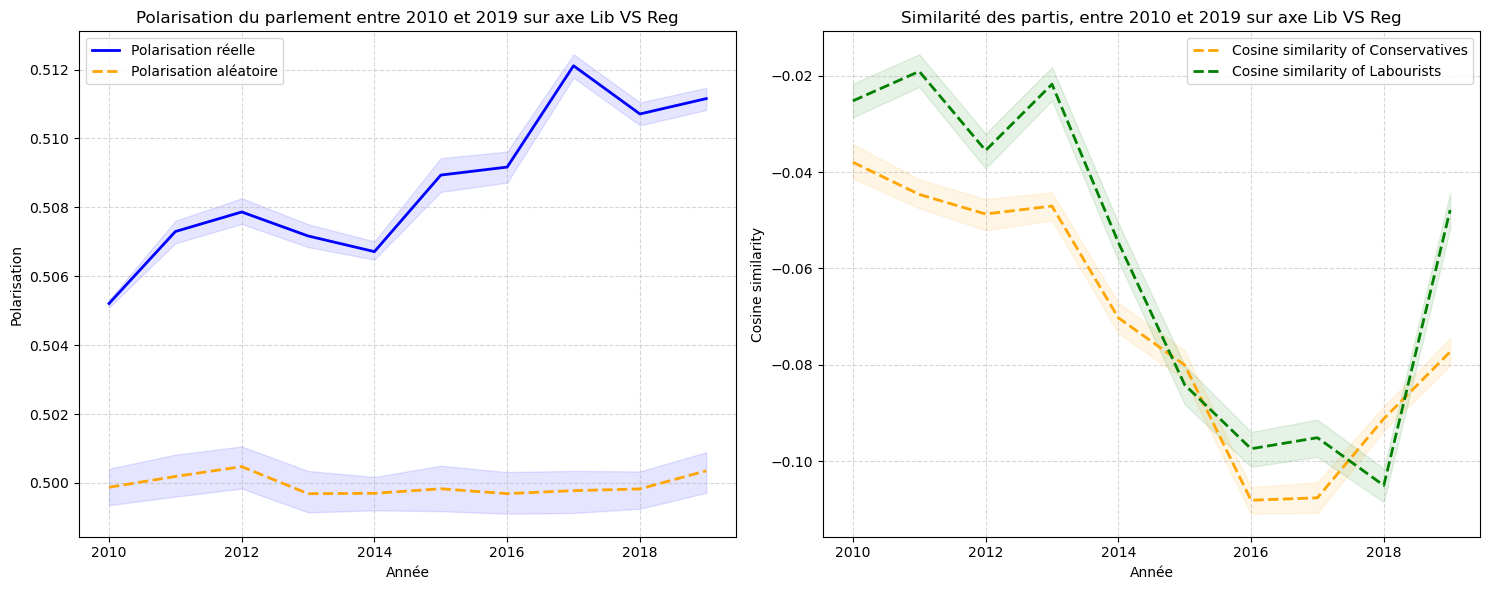

In [6]:
# Création de la grille de sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Premier graphique
axes[0].plot(x, real_pol, label="Polarisation réelle", color="blue", linewidth=2)
axes[0].fill_between(x, CI_lows_real, CI_high_real, color="blue", alpha=0.1)
axes[0].plot(
    x,
    random_pol,
    label="Polarisation aléatoire",
    color="orange",
    linestyle="--",
    linewidth=2,
)
axes[0].fill_between(x, CI_lows_random, CI_high_random, color="blue", alpha=0.1)
axes[0].set_title("Polarisation du parlement entre 2010 et 2019 sur axe Lib VS Reg")
axes[0].set_xlabel("Année")
axes[0].set_ylabel("Polarisation")
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.5)

# Deuxième graphique
axes[1].plot(
    x,
    Con_cos,
    label="Cosine similarity of Conservatives",
    color="orange",
    linestyle="--",
    linewidth=2,
)
axes[1].fill_between(x, Con_CI_low, Con_CI_high, color="orange", alpha=0.1)
axes[1].plot(
    x,
    Lab_cos,
    label="Cosine similarity of Labourists",
    color="green",
    linestyle="--",
    linewidth=2,
)
axes[1].fill_between(x, Lab_CI_low, Lab_CI_high, color="green", alpha=0.1)
axes[1].set_title("Similarité des partis, entre 2010 et 2019 sur axe Lib VS Reg")
axes[1].set_xlabel("Année")
axes[1].set_ylabel("Cosine similarity")
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()  # Ajustement automatique des marges
plt.show()

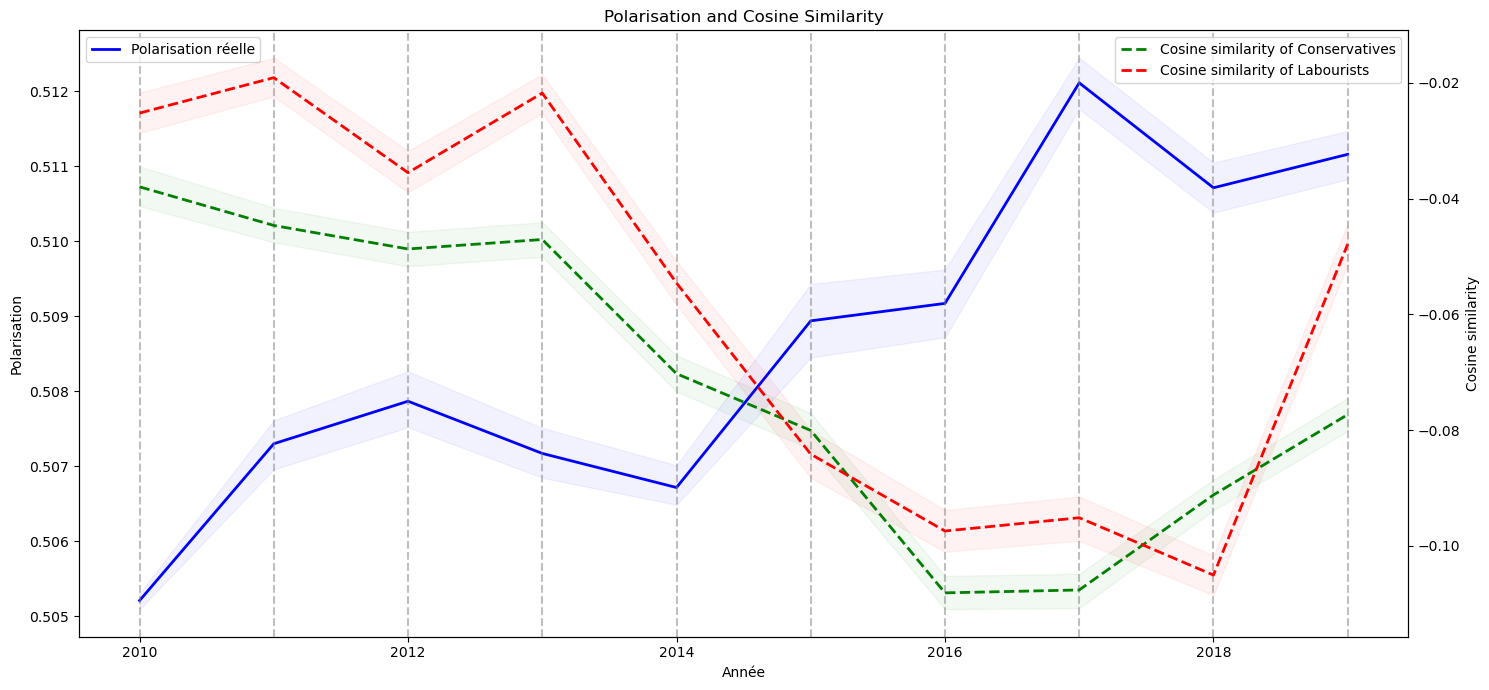

In [136]:
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting the first set of data
ax1.plot(x, real_pol, label="Polarisation réelle", color="blue", linewidth=2)
ax1.fill_between(x, CI_lows_real, CI_high_real, color="blue", alpha=0.05)
ax1.set_xlabel("Année")
ax1.set_ylabel("Polarisation")
ax1.legend(loc="upper left")

# Creating a second y-axis
ax2 = ax1.twinx()

# Plotting the second set of data on the secondary y-axis
ax2.plot(
    x,
    Con_cos,
    label="Cosine similarity of Conservatives",
    color="green",
    linestyle="--",
    linewidth=2,
)
ax2.fill_between(x, Con_CI_low, Con_CI_high, color="green", alpha=0.05)
ax2.plot(
    x,
    Lab_cos,
    label="Cosine similarity of Labourists",
    color="red",
    linestyle="--",
    linewidth=2,
)
ax2.fill_between(x, Lab_CI_low, Lab_CI_high, color="red", alpha=0.05)
ax2.set_ylabel("Cosine similarity")
ax2.legend(loc="upper right")

# Adding vertical dotted lines for each year
for year in x:
    ax1.axvline(year, color="gray", linestyle="--", alpha=0.5)

plt.title("Polarisation and Cosine Similarity sur Lib VS Reg")
plt.grid(True, linestyle="--", alpha=0.5, axis="x")  # Adding both x and y gridlines
plt.tight_layout()
plt.show()

# **Try of linear regression**

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Linear

In [140]:
x = Con_cos.reshape(-1, 1)
y = real_pol

model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

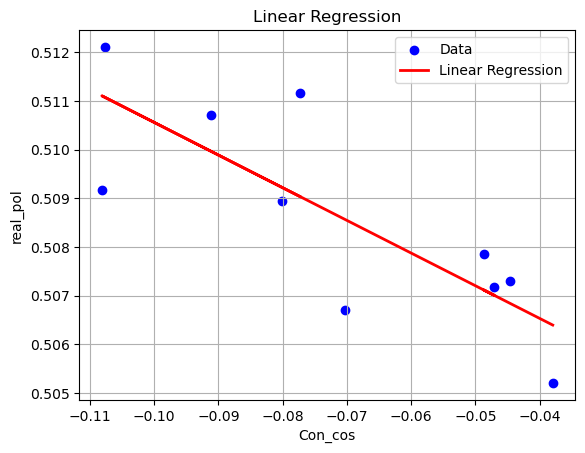

In [152]:
# Predict y-values using the fitted model
y_pred = model.predict(x)

# Plot the original data points
plt.scatter(x, y, color="blue", label="Data")

# Plot the regression line
plt.plot(x, y_pred, color="red", linewidth=2, label="Linear Regression")

# Add labels and legend
plt.xlabel("Con_cos")
plt.ylabel("real_pol")
plt.title("Linear Regression")
plt.legend()

# Show plot
plt.grid(True)
plt.show()

## Multilinear

In [175]:
x = np.column_stack((Con_cos, Lab_cos))
y = real_pol

transformer = PolynomialFeatures(degree=2, include_bias=False)

transformer.fit(x)

x_ = transformer.transform(x)

x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

model = LinearRegression().fit(x_, y)

r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")

coefficient of determination: 0.8216874269052193
intercept: 0.510101670514352
coefficients: [  0.45345591  -0.37397406  11.39993479 -17.95608171   7.24824343]


# **Restriction to newspapers**

## All newspapers

In [69]:
party_1 = 'Lab'
party_2 = 'Con'

left_np = ['GUA', 'MET']
right_np = ['TE', 'DE', 'DM']

def translate_party(newspaper) :
    if newspaper in left_np :
        return 'Lab'
    else :
        return 'Con'

In [70]:
df_proj = pd.read_csv("data/current_dataframes/df")

df_proj['party'] = df_proj['source'].apply(translate_party)

df_par = df_proj.loc[(df_proj["party"] == "Lab") | (df_proj["party"] == "Con")]

df_par_grouped = df_par[["party", "year", "cos axe 1", "cos axe 2"]]
df_par_grouped = df_par_grouped.groupby(["party", "year"]).mean()
df_par_grouped = df_par_grouped.reset_index()

df_par_grouped = bootstrap(df_par_grouped, df_par, source_column="party", axis=1)

df_pol = pd.read_csv(
    "data/polarization values/left right newspapers polarisation values"
)

In [61]:
real_pol = np.array(df_pol["real polarization"])
random_pol = np.array(df_pol["random polarization"])
CI_lows_real = np.array(df_pol["real low CI"])
CI_high_real = np.array(df_pol["real high CI"])
CI_lows_random = np.array(df_pol["random low CI"])
CI_high_random = np.array(df_pol["random high CI"])

Con_cos = np.array(df_par_grouped[df_par_grouped["party"] == "Con"]["cos axe 1"])
Con_CI_low = np.array(
    df_par_grouped[df_par_grouped["party"] == "Con"]["CI_1_inf"], dtype="float"
)
Con_CI_high = np.array(
    df_par_grouped[df_par_grouped["party"] == "Con"]["CI_1_sup"], dtype="float"
)

Lab_cos = np.array(df_par_grouped[df_par_grouped["party"] == "Lab"]["cos axe 1"])
Lab_CI_low = np.array(
    df_par_grouped[df_par_grouped["party"] == "Lab"]["CI_1_inf"], dtype="float"
)
Lab_CI_high = np.array(
    df_par_grouped[df_par_grouped["party"] == "Lab"]["CI_1_sup"], dtype="float"
)

x = [2010 + i for i in range(14)]

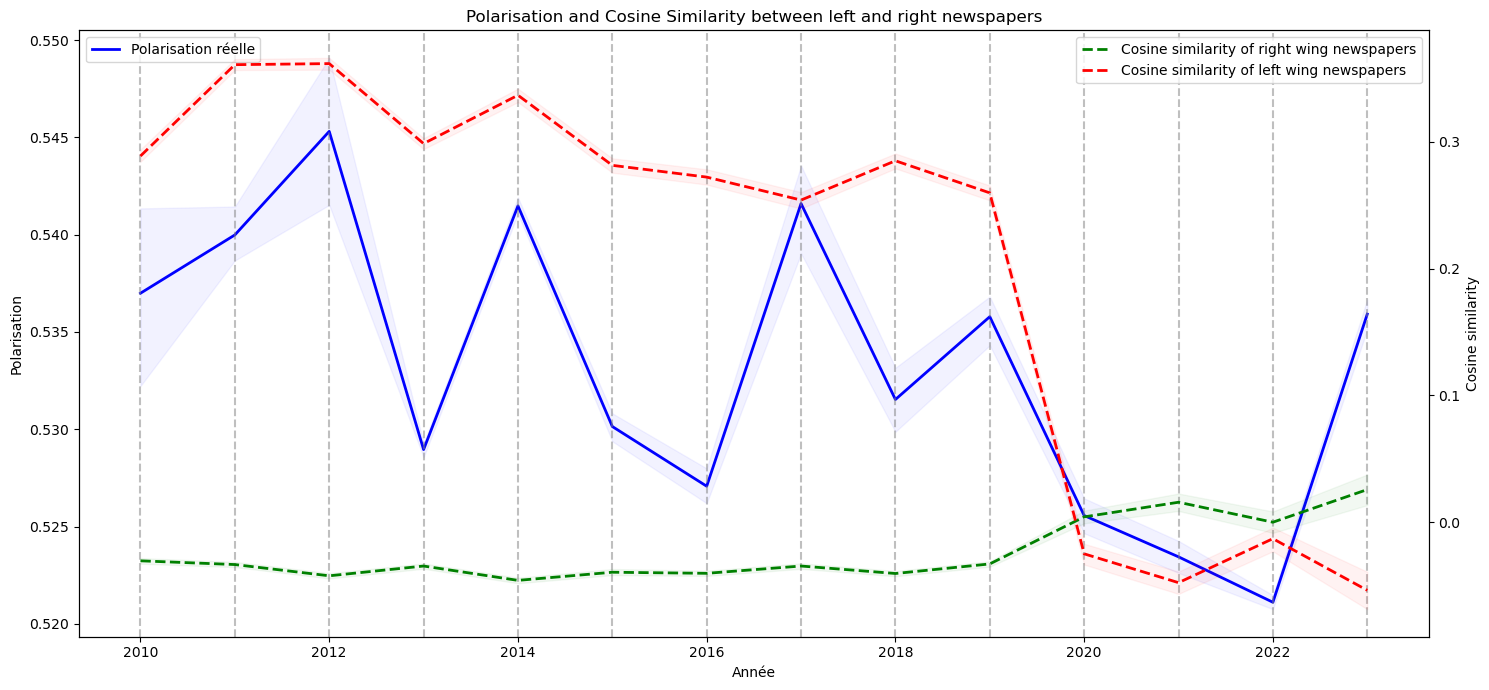

In [62]:
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting the first set of data
ax1.plot(x, real_pol, label="Polarisation réelle", color="blue", linewidth=2)
ax1.fill_between(x, CI_lows_real, CI_high_real, color="blue", alpha=0.05)
ax1.set_xlabel("Année")
ax1.set_ylabel("Polarisation")
ax1.legend(loc="upper left")

# Creating a second y-axis
ax2 = ax1.twinx()

# Plotting the second set of data on the secondary y-axis
ax2.plot(
    x,
    Con_cos,
    label="Cosine similarity of right wing newspapers",
    color="green",
    linestyle="--",
    linewidth=2,
)
ax2.fill_between(x, Con_CI_low, Con_CI_high, color="green", alpha=0.05)
ax2.plot(
    x,
    Lab_cos,
    label="Cosine similarity of left wing newspapers",
    color="red",
    linestyle="--",
    linewidth=2,
)
ax2.fill_between(x, Lab_CI_low, Lab_CI_high, color="red", alpha=0.05)
ax2.set_ylabel("Cosine similarity")
ax2.legend(loc="upper right")

# Adding vertical dotted lines for each year
for year in x:
    ax1.axvline(year, color="gray", linestyle="--", alpha=0.5)

plt.title("Polarisation and Cosine Similarity between left and right newspapers")
plt.grid(True, linestyle="--", alpha=0.5, axis="x")  # Adding both x and y gridlines
plt.tight_layout()
plt.show()

## Broadsheets

In [63]:
party_1 = 'Lab'
party_2 = 'Con'

left_np = ['GUA']
right_np = ['TE']

def translate_party(newspaper) :
    if newspaper in left_np :
        return 'Lab'
    else :
        return 'Con'

In [64]:
df_proj = pd.read_csv("data/current_dataframes/df")

df_proj['party'] = df_proj['source'].apply(translate_party)

df_par = df_proj.loc[(df_proj["party"] == "Lab") | (df_proj["party"] == "Con")]

df_par_grouped = df_par[["party", "year", "cos axe 1", "cos axe 2"]]
df_par_grouped = df_par_grouped.groupby(["party", "year"]).mean()
df_par_grouped = df_par_grouped.reset_index()

df_par_grouped = bootstrap(df_par_grouped, df_par, source_column="party", axis=1)

df_pol = pd.read_csv(
    "data/polarization values/Guardian VS Telegraph polarisation values"
)

In [65]:
real_pol = np.array(df_pol["real polarization"])
random_pol = np.array(df_pol["random polarization"])
CI_lows_real = np.array(df_pol["real low CI"])
CI_high_real = np.array(df_pol["real high CI"])
CI_lows_random = np.array(df_pol["random low CI"])
CI_high_random = np.array(df_pol["random high CI"])

Con_cos = np.array(df_par_grouped[df_par_grouped["party"] == "Con"]["cos axe 1"])
Con_CI_low = np.array(
    df_par_grouped[df_par_grouped["party"] == "Con"]["CI_1_inf"], dtype="float"
)
Con_CI_high = np.array(
    df_par_grouped[df_par_grouped["party"] == "Con"]["CI_1_sup"], dtype="float"
)

Lab_cos = np.array(df_par_grouped[df_par_grouped["party"] == "Lab"]["cos axe 1"])
Lab_CI_low = np.array(
    df_par_grouped[df_par_grouped["party"] == "Lab"]["CI_1_inf"], dtype="float"
)
Lab_CI_high = np.array(
    df_par_grouped[df_par_grouped["party"] == "Lab"]["CI_1_sup"], dtype="float"
)

x = [2010 + i for i in range(14)]

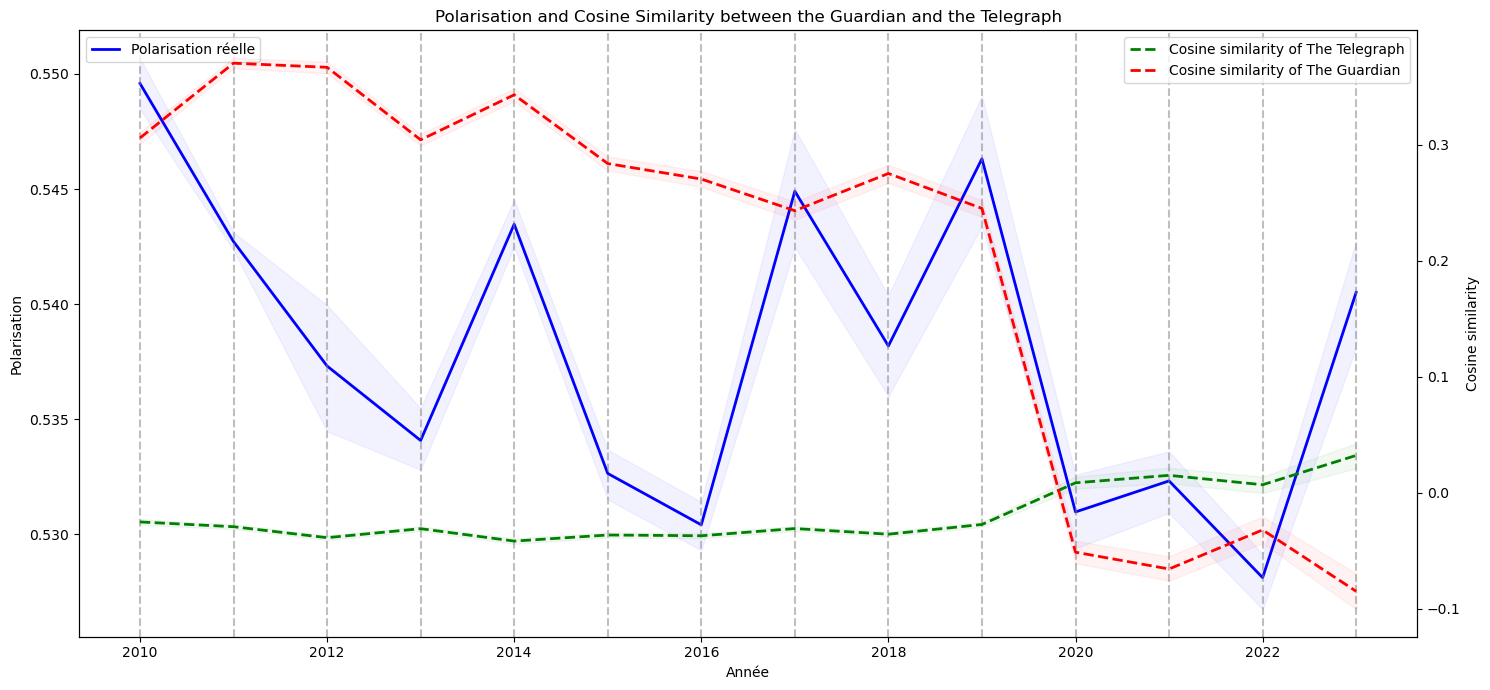

In [66]:
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting the first set of data
ax1.plot(x, real_pol, label="Polarisation réelle", color="blue", linewidth=2)
ax1.fill_between(x, CI_lows_real, CI_high_real, color="blue", alpha=0.05)
ax1.set_xlabel("Année")
ax1.set_ylabel("Polarisation")
ax1.legend(loc="upper left")

# Creating a second y-axis
ax2 = ax1.twinx()

# Plotting the second set of data on the secondary y-axis
ax2.plot(
    x,
    Con_cos,
    label="Cosine similarity of The Telegraph",
    color="green",
    linestyle="--",
    linewidth=2,
)
ax2.fill_between(x, Con_CI_low, Con_CI_high, color="green", alpha=0.05)
ax2.plot(
    x,
    Lab_cos,
    label="Cosine similarity of The Guardian",
    color="red",
    linestyle="--",
    linewidth=2,
)
ax2.fill_between(x, Lab_CI_low, Lab_CI_high, color="red", alpha=0.05)
ax2.set_ylabel("Cosine similarity")
ax2.legend(loc="upper right")

# Adding vertical dotted lines for each year
for year in x:
    ax1.axvline(year, color="gray", linestyle="--", alpha=0.5)

plt.title("Polarisation and Cosine Similarity between the Guardian and the Telegraph")
plt.grid(True, linestyle="--", alpha=0.5, axis="x")  # Adding both x and y gridlines
plt.tight_layout()
plt.show()